In [7]:
import numpy as libnp
import pandas as libpan
import matplotlib.pyplot as libplt

<h2>Simple Regression Dataset - Straight Line</h2>

Input Feature: X  

Target: 5*X + 8 + some noise

Objective: Train a model to predict target for a given X

In [23]:
# Straight Line Function
def straight_line(x):
    return 5*x + 3.141

In [24]:
straight_line(25)

128.141

In [25]:
straight_line(1.254)

9.411

In [26]:
np.random.seed(5)

samples = 150
x = pd.Series(np.arange(0,150))
y = x.map(straight_line) + np.random.randn(samples)*.8

In [27]:
df = pd.DataFrame({'x':x,'y':y})

In [28]:
df.head()

,x,y
0,0,3.493982
1,1,7.876304
2,2,15.085617
3,3,17.939326
4,4,23.228688


In [29]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y
x,1.000000,0.999993
y,0.999993,1.000000


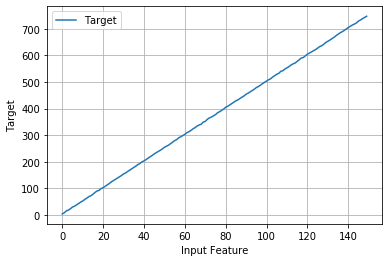

In [30]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [31]:
# Save all data
df.to_csv('linear_all.csv',index=False,
          columns=['x','y'])

<h2>SageMaker Convention for Training and Validation files</h2>

CSV File Column order: y_noisy, x

Training, Validation files do not have a column header

In [32]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [33]:
df.head()

,x,y
82,82,413.737582
134,134,673.883013
114,114,571.272503
42,42,213.221591
109,109,548.722563


In [34]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [35]:
print(rows, train, test)

150 105 45


In [21]:
# Write Training Set
df[:train].to_csv('linear_train.csv',index=False,header=False,columns=['y','x'])

In [22]:
# Write Validation Set
df[train:].to_csv('linear_validation.csv',index=False,header=False,columns=['y','x'])

In [37]:
print ("finito")

finito
